This notebook loads a unfil, unwrapped igram and the DEM and plots phase vs. elevation (2D histogram perhaps?) to see if there is a linear relationship.

This notebook was written on 5-10-23. 

***

In [1]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator
%matplotlib  widget

In [2]:
# this one is to pick out the dates 
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

Load the DEM.

In [3]:
driver=gdal.GetDriverByName('ISCE')
demDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/geom_reference'
x1 = 18000; x2 = 14000
y1 = 2100;  y2 = 1000
# larger cropped area with western mountains 
dx = 4000
dy = 1100

file = demDir+'/hgt.rdr.full'
ds = gdal.Open(file,gdal.GA_ReadOnly)
elev = ds.GetRasterBand(1).ReadAsArray(x2,y2,dx,dy)

print('DEM loaded.')

DEM loaded.


Plot the DEM.

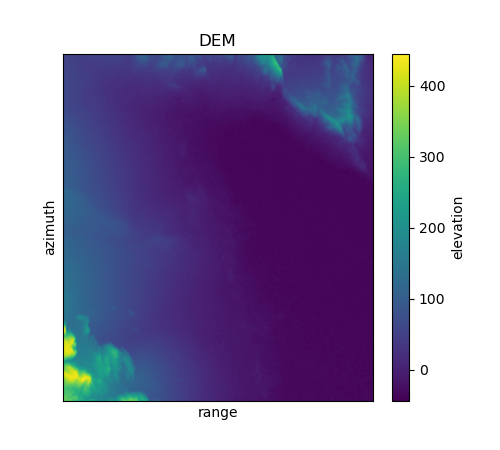

In [4]:
plt.figure(figsize=(5,4.5))
plt.imshow(elev, cmap='viridis',aspect='auto'); plt.xlim(dx,0); plt.xticks([]); plt.yticks([])
plt.xlabel('range'); plt.ylabel('azimuth'); plt.title('DEM'); plt.colorbar(label='elevation')
plt.show()

Load an unfilt, unwrapped igram and plot it.

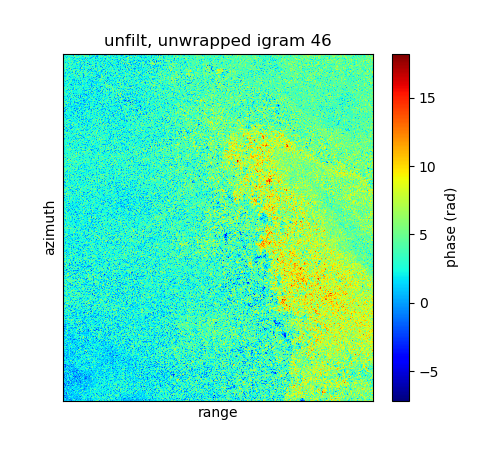

In [31]:
driver=gdal.GetDriverByName('ISCE')

# igramsDir is where the cropped, unwrapped igrams are
igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/'

i = 46
igramFile = igramsDir+dates[i]+'_'+dates[i+1]+'_unfilt.unw'
ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
temp_igram = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

# plot it 
plt.figure(figsize=(5,4.5))
plt.imshow(temp_igram, cmap='jet',aspect='auto',interpolation='nearest'); 
plt.xlim(dx,0); plt.xticks([]); plt.yticks([])
plt.xlabel('range'); plt.ylabel('azimuth'); plt.title('unfilt, unwrapped igram '+str(i)) 
plt.colorbar(label='phase (rad)'); plt.show()

Now plot phase vs. elevation. See if there is a linear relationship.

In [32]:
# plt.figure(figsize=(8,8),tight_layout=True)
# plt.semilogy(temp_igram.flatten(),elev.flatten(),'k.')
# plt.xlabel('phase (rad)'); plt.ylabel('elevation (m)')
# plt.title('phase vs. elevation for igram '+str(i)) 
# plt.show()

Now fit a line, see if it fits the data. And plot it as a 3D histogram instead.

(200, 200)


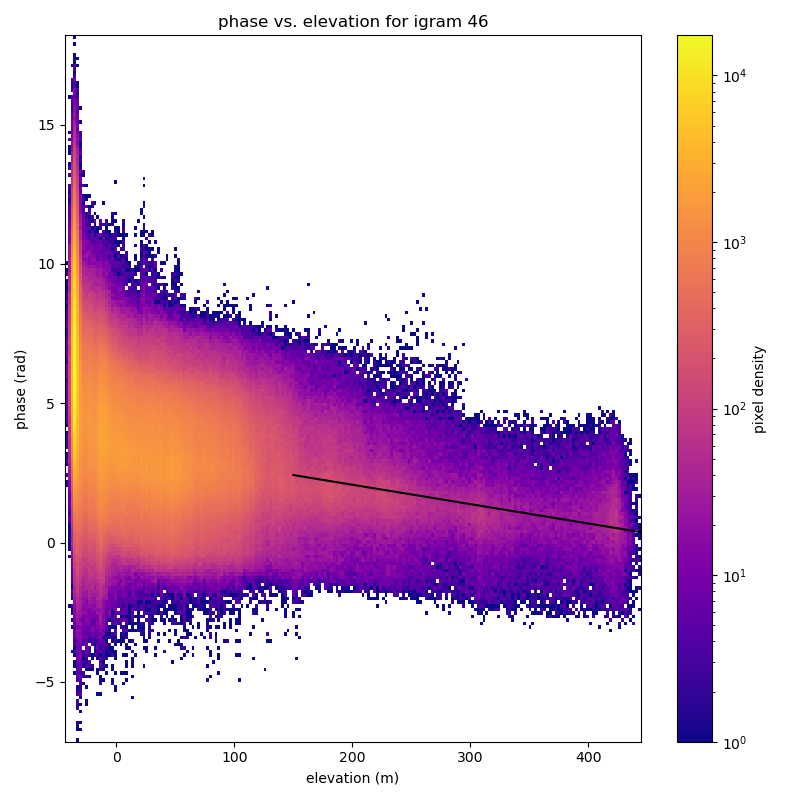

In [33]:
import matplotlib.colors as mcolors
numBins = 200
# add condition that elevations over -20 m 
phs = temp_igram.flatten()[(elev.flatten() > 150)]
els = elev.flatten()[(elev.flatten() > 150)]
m, b = np.polyfit(els,phs,1)
x = [els.min(), els.max()]
y = [m*els.min()+b, m*els.max()+b]

plt.figure(figsize=(8,8),tight_layout=True)
h = plt.hist2d(elev.flatten(),temp_igram.flatten(),bins=numBins,norm=mcolors.LogNorm()) #,cmin=1,cmax=1000
#h = plt.hist2d(phs,els,bins=numBins,norm=mcolors.LogNorm()) #,cmin=1,cmax=1000
plt.colorbar(label='pixel density'); plt.set_cmap('plasma') # plasma is original 
plt.plot(x,y,'k-')
plt.ylabel('phase (rad)'); plt.xlabel('elevation (m)')
plt.title('phase vs. elevation for igram '+str(i)) 
plt.show()